In [162]:
import numpy
from scipy import misc
import matplotlib.pyplot as plt
import copy
import numpy as np

In [ ]:
## def histeq(pic):
    # Follow the procedures of Histogram Equalizaion
    # Modify the pixel value of pic directly
    histogram = np.zeros(65535)
    [M,N] = pic.shape
    for i in range(M):
        for j in range(N):
            histogram[pic[i][j]]+=1
    cdf = np.zeros(65535)
    for i in range(65535):
        cdf[i] = sum(histogram[0:i])
    for i in range(M):
        for j in range(N):
            if(cdf[pic[i][j]] != 0):
                pic[i][j] = (cdf[pic[i][j]] - min(cdf))*(65534)/(M*N-1)     
    return pic

C:\Users\Katherine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


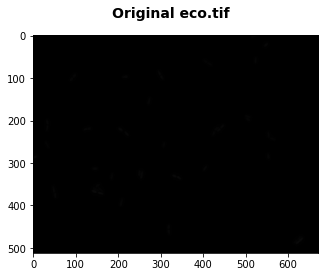

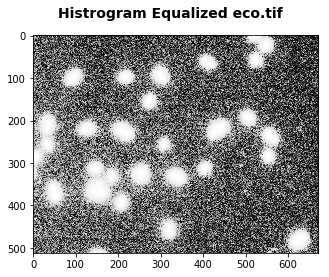

In [164]:
# Histogram Equilization
eco_origin = misc.imread('eco.tif');
eco_histeq = copy.deepcopy(eco_origin);
# Call to histeq to perform Histogram Equilization
eco_histeq = histeq(eco_histeq);
# Show the result in two windows
fig_eco_origin = plt.figure(1);
fig_eco_origin.suptitle('Original eco.tif', fontsize=14, fontweight='bold');
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 65535);
fig_eco_histeq = plt.figure(2)
fig_eco_histeq.suptitle('Histrogram Equalized eco.tif', fontsize=14, fontweight='bold');
plt.imshow(eco_histeq,cmap='gray',vmin = 0, vmax = 65535);
plt.show()

In [165]:
# Gaussian Kernel Following the Descriptiong: http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid');
        return None;
    kernel = numpy.zeros((size,size));
    for x in range(size):
        for y in range(size):
            kernel[x][y] = numpy.exp(-((x-(size-1)/2)**2+(y-(size-1)/2)**2)/(2*sigma**2));
    kernel = kernel / numpy.sum(kernel);
    return kernel

# Edge Detection Kernel Source:https://alwaysbusycorner.com/2011/12/02/realbasic-canvas-tutorial-lesson-11-edge-detection-kernel-builder/  
def genxkernel(flag=1):
    if flag == 1:
        kernel = numpy.array([[-1,0,1]]*3);
    else:
        kernel = numpy.array([[-1,0,1],[-2,0,-2],[-1,0,-1]]);
    return kernel

def genykernel(flag=1):
    if flag == 1:
        kernel = numpy.array([[-1,-1,-1],[0,0,0],[1,1,1]]);
    else:
        kernel = numpy.array([[-1,-2,-1],[0,0,0],[1,2,1]]);
    return kernel

# Merge Detected X-Edge and Y-Edge
def merge(picx,picy):
    picshape = numpy.shape(picx);
    if picshape != numpy.shape(picy):
        print('Pic Size Not Matched!');
        return picx;
    picmerge = numpy.zeros(picshape);
    for row in range(picshape[0]):
        for col in range(picshape[1]):
            for channel in range(picshape[2]):
                picmerge[row][col][channel] = numpy.sqrt((picx[row][col][channel]**2+picy[row][col][channel]**2)/2);
    picmerge = picmerge.astype(picx.dtype,copy=False);
    return picmerge;

In [166]:
def conv2(pic,kernel):
    # Create a new pic with same size but float type
    pic_conv = numpy.zeros(numpy.shape(pic))
    M = pic.shape[0]
    N = pic.shape[1]
    # Perform 2-D Convolution with the given kernel
    size = kernel.shape[0]
    length = int(size/2)
    #reverse kernel for convolution
    kernel = kernel[::-1]
    for i in range(size):
        kernel[i] = kernel[i][::-1]
    
    for i in range(M):
        for j in range(N):
            if(i-length<0 or j-length<0 or j+length > N-1 or i+length > M-1):
                pass
            else: 
                for k in range(3):  
                    for a in range(-1,2):
                        for b in range(-1,2):
                            #block = pic[i-length:i+length+1,j-length:j+length+1,k]
                            pic_conv[i][j][k] += kernel[a][b]*pic[i+a][j+b][k]
    
    return pic_conv/256

C:\Users\Katherine\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


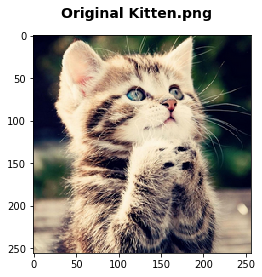

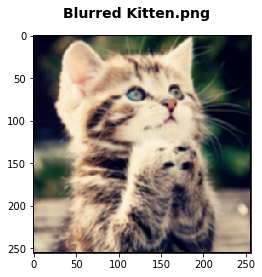

In [167]:
# Main Function Starts Here!!!
# Gaussian Blur Kernel
# Read Image and Display
kitten_origin = misc.imread('kitten.png');
fig_kitten_origin = plt.figure(1);
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold');
plt.imshow(kitten_origin,vmin = 0, vmax = 255);
plt.show(block=False);
# Generate Kernel
kernel_blur = gengaussian(3);
# Apply Convolution
kitten_blur = conv2(kitten_origin,kernel_blur)
# Display Results
fig_kitten_blur = plt.figure(2);
fig_kitten_blur.suptitle('Blurred Kitten.png', fontsize=14, fontweight='bold');
plt.imshow(kitten_blur,vmin = 0, vmax = 255);
plt.show(block=False);


C:\Users\Katherine\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


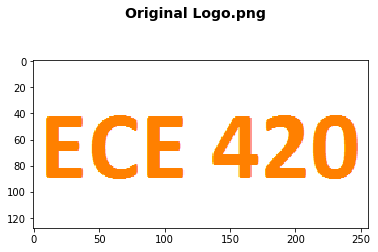

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


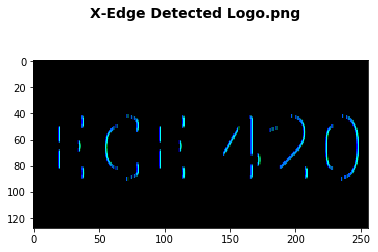

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


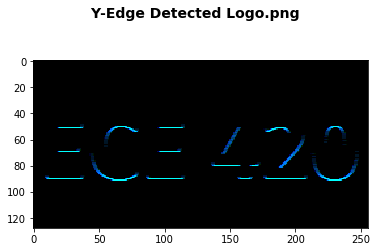

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


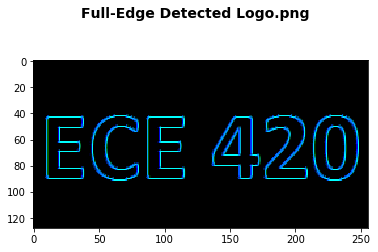

In [168]:

# Edge Detection Kernel
# Read Image and Display
logo_origin = misc.imread('logo.png');
fig_logo_origin = plt.figure(3);
fig_logo_origin.suptitle('Original Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_origin,vmin = 0, vmax = 255);
plt.show(block=False);
# X-Edge Detection
kernel_xedge = genxkernel();
logo_xedge = conv2(logo_origin,kernel_xedge)
fig_logo_xedge = plt.figure(4);
fig_logo_xedge.suptitle('X-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_xedge,vmin = 0, vmax = 255);
plt.show(block=False);
# Y-Edge Detection
kernel_yedge = genykernel();
logo_yedge = conv2(logo_origin,kernel_yedge)
fig_logo_yedge = plt.figure(5);
fig_logo_yedge.suptitle('Y-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_yedge,vmin = 0, vmax = 255);
plt.show(block=False);
# Merge Edges
logo_fulledge = merge(logo_xedge,logo_yedge);
fig_logo_fulledge = plt.figure(6);
fig_logo_fulledge.suptitle('Full-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_fulledge,vmin = 0, vmax = 255);

#### Answer:
1. The array size depends on number of possible pixel values and the type can just be int, because it records number of times that this specific pixel value appears in the image. 
2. I used seperate arrays for histogram and CDF, and I calculated CDF directly from the histogram array. I could store the calculated CDF in the histogram array so that only one array is allocated on memory.
3. For histogram equalization, we want to know the frequency of every pixel value, so normalizing CDF will map pixel values to be of a larger range.